In [19]:
%load_ext autoreload
%autoreload 2

from lib import *

cuda:0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
train_data = torchvision.datasets.MNIST(root='./data',
                   train=True,
                   download=True,
                   transform=torchvision.transforms.ToTensor())

test_data = torchvision.datasets.MNIST(root='./data',
                   train=False,
                   download=True,
                   transform=torchvision.transforms.ToTensor())

train_X, train_Y = train_data.data.numpy(), train_data.targets.numpy()
test_X, test_Y = test_data.data.numpy(), test_data.targets.numpy()

In [6]:
train_X_r = train_X.reshape(60000, 28,28)
test_X_r = test_X.reshape(10000, 28,28)

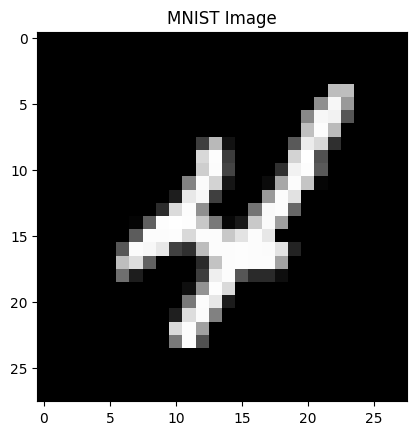

In [7]:
plt.imshow(train_X[9], cmap='gray')
plt.title('MNIST Image')
plt.show()

In [12]:
train_X_cd = np.array([cv.cornerHarris(x,2,3,0.04) for x in train_X])
test_X_cd = np.array([cv.cornerHarris(x,2,3,0.04) for x in test_X])

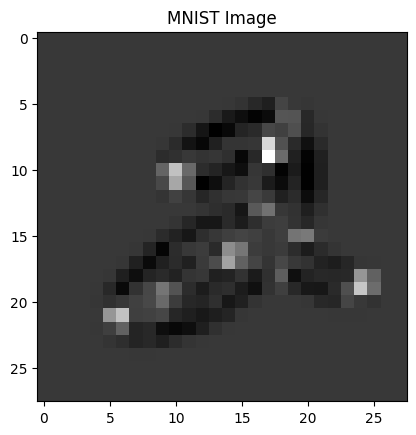

In [13]:
plt.imshow(train_X_cd[5].reshape((28,28)), cmap='gray')
plt.title('MNIST Image')
plt.show()

In [21]:
n_components = 10
train_PCA = sklearn.decomposition.PCA(n_components)
train_X_pc = train_PCA.fit_transform(train_X_r.reshape((60000,28*28)))
test_X_pc = sklearn.decomposition.PCA(n_components).fit_transform(test_X_r.reshape((10000,28*28)))

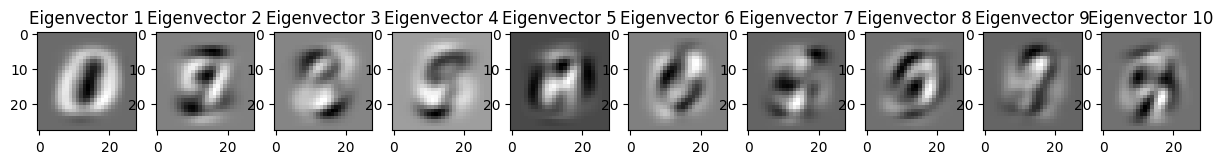

In [22]:
eigenimages = train_PCA.components_.reshape((n_components, 28, 28))

# Plot the eigenimages
plt.figure(figsize=(15, 3))
for i in range(n_components):
    plt.subplot(1, n_components, i + 1)
    plt.imshow(eigenimages[i], cmap='gray')
    plt.title(f'Eigenvector {i + 1}')


In [39]:
import sklearn.tree
dt_clf_pc = sklearn.tree.DecisionTreeClassifier(max_depth=12)
dt_clf_pc.fit(train_X_pc.reshape(60000,n_components),train_Y)
print(dt_clf_pc.score(train_X_pc.reshape(60000,n_components),train_Y))
print(dt_clf_pc.score(test_X_pc.reshape(10000,n_components),test_Y))

0.86605
0.1276


In [40]:
import graphviz
dot_data = sklearn.tree.export_graphviz(dt_clf_pc, out_file=None, filled=True)
graph = graphviz.Source(dot_data, format="svg")
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.svg'